## How has Covid-19 affected you? Identifying emotions from user-generated text using Deep      Neural architectures.

# Importing the Libraries

In [1]:
import os
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from gensim.models import Word2Vec
from gensim import models
from gensim.models.keyedvectors import KeyedVectors
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
import csv
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\My PC\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.

Bad key "axes.titlelocation" on line 298 in
C:\Users\My PC\Desktop\data\matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matp

# Loading the Dataset

In [2]:
data_path = "data_incl_demographics.csv"
data_raw = pd.read_csv(data_path)
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")

data_raw.head()

Number of rows in data = 2491
Number of columns in data = 12


**Sample data:**


,chosen_emotion,text_long,text_short,worry,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire
0,Sadness,It is less an much an issue of how it affects ...,It is very easy! Stay inside so you are not sp...,3,5,5,3,7,7,2,4,5
1,Anxiety,I am concerned that the true impact of the cur...,"Things are difficult now, but we must all pull...",8,6,7,7,8,6,4,3,1
2,Relaxation,"Personally, I am fairly calm about the corona ...","People should try and remain calm, as panic wi...",4,1,1,2,2,4,7,7,2
3,Relaxation,In this very moment as I am fortunate to be ab...,Fortunate to feel calm and relaxed but worried...,6,4,2,3,4,1,6,7,3
4,Anxiety,I am more worried about getting access to my n...,Not being able to cuddle my family sucks!,6,2,2,5,5,5,4,4,4




# One hot encoding for all labels

In [3]:

data_raw
j=0
for i in data_raw.iterrows():
    if data_raw.worry[j]>=5:
        data_raw.worry[j]=1
    else:
        data_raw.worry[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.anger[j]>=5:
        data_raw.anger[j]=1
    else:
        data_raw.anger[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.anxiety[j]>=5:
        data_raw.anxiety[j]=1
    else:
        data_raw.anxiety[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.sadness[j]>=5:
        data_raw.sadness[j]=1
    else:
        data_raw.sadness[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.desire[j]>=5:
        data_raw.desire[j]=1
    else:
        data_raw.desire[j]=0
    j=j+1

j=0
for i in data_raw.iterrows():
    if data_raw.disgust[j]>=5:
        data_raw.disgust[j]=1
    else:
        data_raw.disgust[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.fear[j]>=5:
        data_raw.fear[j]=1
    else:
        data_raw.fear[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.happiness[j]>=5:
        data_raw.happiness[j]=1
    else:
        data_raw.happiness[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.relaxation[j]>=5:
        data_raw.relaxation[j]=1
    else:
        data_raw.relaxation[j]=0
    j=j+1


data_raw


C:\Users\My PC\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\My PC\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\My PC\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\My PC\anaconda3\lib\site-packages\ipykernel_launch

,chosen_emotion,text_long,text_short,worry,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire
0,Sadness,It is less an much an issue of how it affects ...,It is very easy! Stay inside so you are not sp...,0,1,1,0,1,1,0,0,1
1,Anxiety,I am concerned that the true impact of the cur...,"Things are difficult now, but we must all pull...",1,1,1,1,1,1,0,0,0
2,Relaxation,"Personally, I am fairly calm about the corona ...","People should try and remain calm, as panic wi...",0,0,0,0,0,0,1,1,0
3,Relaxation,In this very moment as I am fortunate to be ab...,Fortunate to feel calm and relaxed but worried...,1,0,0,0,0,0,1,1,0
4,Anxiety,I am more worried about getting access to my n...,Not being able to cuddle my family sucks!,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2486,Desire,I feel sad for the loss of life and the pain t...,Dont worry about it everyone we are nearing th...,0,0,0,0,0,0,1,1,1
2487,Fear,I fear that the virus is more deadly than w...,Wish you a speedy recovery Boris,1,0,1,1,1,1,0,0,0
2488,Fear,I feel stressed and anxious about people ignor...,Please stay home to keep us all alive,1,1,1,1,1,1,0,0,0
2489,Anxiety,It is quite worrying even though it said to ha...,There are people who still believe it is okay ...,1,0,1,1,1,1,0,1,1


# Getting the Empath Vectors

In [4]:
j=[]
y=0
b=0
from empath import Empath
lexicon = Empath()
for i in data_raw.iterrows():
    
    
    a=list(lexicon.analyze(data_raw.text_short[b], normalize=True).values())
    
    
    j.append(a)
    
    b=b+1
    
g=np.array(j)
        
        
        
        
        
        
        


MAX_SEQUENCE_LENGTH=50

z_train=pad_sequences(g, maxlen=MAX_SEQUENCE_LENGTH)
z_train.shape

(2491, 50)

In [5]:
data_train2, data_test2 = train_test_split(z_train, test_size=0.10, random_state=42)
        
data_train2.shape

        
        



(2241, 50)

# Preliminary Data Exploration

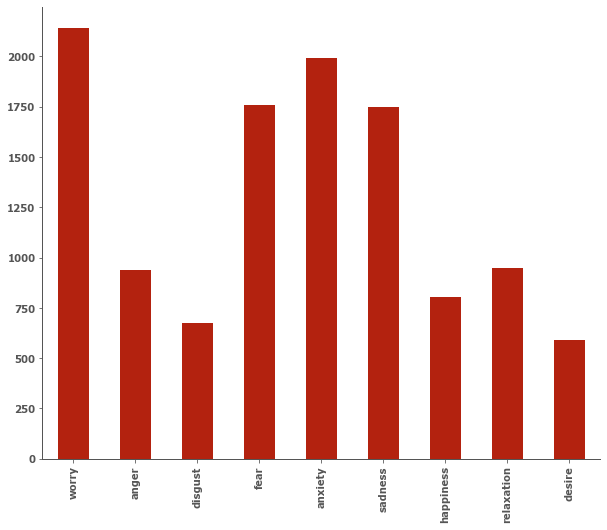

In [6]:
emotion_labels=data_raw[['worry','anger','disgust','fear','anxiety','sadness','happiness','relaxation','desire']]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

emotion_labels.sum(axis=0).plot.bar()

# Data Pre-Processing and Tokenisation

In [7]:
def preprocess_text(sen): 
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
data_raw['Text_Clean'] = data_raw['text_short'].apply(lambda x: preprocess_text(x))


In [8]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in data_raw.Text_Clean]

In [9]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] 

In [10]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [11]:
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stoplist]

In [12]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens] 

In [13]:
result = [' '.join(sen) for sen in filtered_words]

In [14]:

data_raw['Text_Final'] = result


In [15]:
data_raw['tokens'] = filtered_words

In [16]:
data_raw=data_raw[['Text_Final', 'tokens','worry','anger','disgust','fear','anxiety','sadness','happiness','relaxation','desire']]

In [17]:
data_raw

,Text_Final,tokens,worry,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire
0,easy stay inside spreading vulnerable people w...,"[easy, stay, inside, spreading, vulnerable, pe...",0,1,1,0,1,1,0,0,1
1,things difficult must pull together get must r...,"[things, difficult, must, pull, together, get,...",1,1,1,1,1,1,0,0,0
2,people try remain calm panic make situation worse,"[people, try, remain, calm, panic, make, situa...",0,0,0,0,0,0,1,1,0
3,fortunate feel calm relaxed worried long term ...,"[fortunate, feel, calm, relaxed, worried, long...",1,0,0,0,0,0,1,1,0
4,able cuddle family sucks,"[able, cuddle, family, sucks]",1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2486,dont worry everyone nearing light end tunnel l...,"[dont, worry, everyone, nearing, light, end, t...",0,0,0,0,0,0,1,1,1
2487,wish speedy recovery boris,"[wish, speedy, recovery, boris]",1,0,1,1,1,1,0,0,0
2488,please stay home keep us alive,"[please, stay, home, keep, us, alive]",1,1,1,1,1,1,0,0,0
2489,people still believe okay leave outside even s...,"[people, still, believe, okay, leave, outside,...",1,0,1,1,1,1,0,1,1


In [18]:
data_train, data_test = train_test_split(data_raw, test_size=0.10, random_state=42)

In [19]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

27498 words total, with a vocabulary size of 3982
Max sentence length is 31


In [20]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

3157 words total, with a vocabulary size of 1167
Max sentence length is 30


# Getting the Word2Vec Embeddings

In [21]:
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz' 
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [22]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [23]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [24]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [25]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 3982 unique tokens.


# Padding Sequences

In [26]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [27]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(3983, 300)


In [28]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Building the 1d Convoluted Layer

In [29]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    #empath vector
    meta_input=Input(shape=(50,),name='data_train2')
    input=concatenate([x, meta_input])
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(inputs=[sequence_input,meta_input], outputs=[preds])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [30]:
label_names = ['worry','anger','disgust','fear','anxiety','sadness','happiness','relaxation','desire']

In [31]:
y_train = data_train[label_names].values

In [32]:
x_train = train_cnn_data
y_tr = y_train

In [33]:
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 300)      1194900     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 49, 200)      120200      embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 48, 200)      180200      embedding_1[0][0]                
____________________________________________________________________________________________

In [34]:
num_epochs = 4
batch_size = 34

# Fitting the Model

In [ ]:
hist = model.fit([x_train,data_train2], y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)



C:\Users\My PC\anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


Train on 2016 samples, validate on 225 samples
Epoch 1/4
2016/2016 [==============================] - 33772s 17s/step - loss: 0.5920 - acc: 0.7106 - val_loss: 0.5679 - val_acc: 0.7185
Epoch 2/4
1496/2016 [=====================>........] - ETA: 2:22:57 - loss: 0.5461 - acc: 0.7302

In [ ]:

predictions = model.predict([test_cnn_data,data_train2], batch_size=1024, verbose=1)